In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

['Sarcasm_Headlines_Dataset_v2.json', 'Sarcasm_Headlines_Dataset.json']


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]
tokenizer=Tokenizer(num_words=100)
# Encodes the sentences
tokenizer.fit_on_texts(sentences)
word_to_index=tokenizer.word_index
print(word_to_index)
# Tokenizer turn the sentences into a set of sequences.
sequences=tokenizer.texts_to_sequences(sentences)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [36]:
test_text=['I really love my dog','My dog loves my manatee']
test_seq=tokenizer.texts_to_sequences(test_text)
print(test_text)
print(test_seq)

['I really love my dog', 'My dog loves my manatee']
[[4, 2, 1, 3], [1, 3, 1]]


In [37]:
tokenizer = Tokenizer(num_words=100,oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_to_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
test_seq = tokenizer.texts_to_sequences(test_text)

print(word_to_index)
print(test_seq)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [38]:
padded = pad_sequences(sequences)

print('\nDictionary: ',word_to_index)
print('\n',sequences)
print('\n',padded)


Dictionary:  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

 [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

 [[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [39]:
padded = pad_sequences(sequences, padding='post',maxlen=5,truncating='post')
print(padded)

[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


## Sarcasm detection ##



In [40]:
df = pd.read_json("../input/Sarcasm_Headlines_Dataset_v2.json",lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [41]:
sentences = df['headline']
label =df['is_sarcastic']
print('number of sentences: ',len(sentences))
print(sentences[3])
print(label[3])

number of sentences:  28619
inclement weather prevents liar from getting to work
1


We split the sentences in training and testing data shuffling them.

In [42]:
idx = np.arange(len(sentences))
np.random.shuffle(idx)
sentences = sentences.iloc[idx]
label = label.iloc[idx]
sentences.reset_index(drop=True,inplace=True)
label.reset_index(drop=True,inplace=True)
print(sentences[3])
print(label[3])

train_set = sentences[:22890]
train_label = label[:22890]
test_set = sentences[22890:]
test_label = label[22890:]
print('number of sentences in training: ', len(train_set))
print('number of sentences in test: ', len(test_set))

train_label=np.array(train_label)
test_label=np.array(test_label)

dead ipod remembered as expensive
1
number of sentences in training:  22890
number of sentences in test:  5729


In [43]:
# Train set tokenize
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train_set)
word_to_index = tokenizer.word_index
print('Length of dictionary is ',len(word_to_index), ' words.')
train_sequences = tokenizer.texts_to_sequences(train_set)
train_padded = pad_sequences(train_sequences, padding='post',maxlen=150,truncating='post')
print('\n',train_sequences[3])
print(train_padded[3])
print('\n Train matrix dimension: ',train_padded.shape)

# Test set tokenize
test_sequences = tokenizer.texts_to_sequences(test_set)
test_padded = pad_sequences(test_sequences, padding='post')
print('\n Test matrix dimension: ',test_padded.shape)

Length of dictionary is  27697  words.

 [171, 5410, 4787, 26, 2602]
[ 171 5410 4787   26 2602    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]

 Train matrix dimension:  (22890, 150)

 Test matrix dimension:  (5729, 29)


In [44]:
vocab_size = len(word_to_index)
embedding_dim = 100

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(100, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()
# Input shape: (batch_size, input_length);
# Output shape: (batch_size, input_length, output_dim)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         2769700   
_________________________________________________________________
global_average_pooling1d_5 ( (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 2,779,901
Trainable params: 2,779,901
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [46]:
history = model.fit(train_padded,
                    train_label,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_padded, test_label),
                    verbose=1)

Train on 22890 samples, validate on 5729 samples
Epoch 1/10
22890/22890 [==============================] - 2s 68us/sample - loss: 0.6477 - acc: 0.6222 - val_loss: 0.4183 - val_acc: 0.8124
Epoch 2/10
22890/22890 [==============================] - 1s 55us/sample - loss: 0.3601 - acc: 0.8519 - val_loss: 0.5607 - val_acc: 0.8508
Epoch 3/10
22890/22890 [==============================] - 1s 56us/sample - loss: 0.2513 - acc: 0.9020 - val_loss: 0.6179 - val_acc: 0.8600
Epoch 4/10
22890/22890 [==============================] - 1s 55us/sample - loss: 0.1889 - acc: 0.9305 - val_loss: 0.7151 - val_acc: 0.8635
Epoch 5/10
22890/22890 [==============================] - 1s 55us/sample - loss: 0.1441 - acc: 0.9483 - val_loss: 0.8231 - val_acc: 0.8649
Epoch 6/10
22890/22890 [==============================] - 1s 56us/sample - loss: 0.1076 - acc: 0.9644 - val_loss: 0.9550 - val_acc: 0.8628
Epoch 7/10
22890/22890 [==============================] - 1s 56us/sample - loss: 0.0802 - acc: 0.9752 - val_loss: 1.1

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

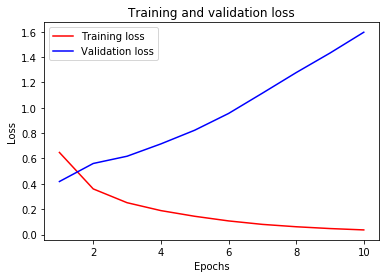

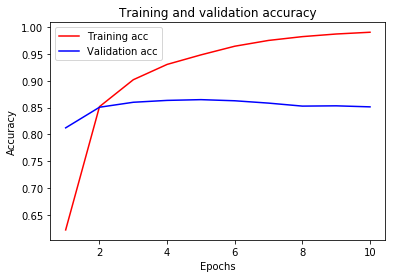

In [48]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [49]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = keras.Sequential([keras.layers.Embedding(vocab_size, embedding_dim),
                         keras.layers.GlobalAveragePooling1D(),
                         keras.layers.Dense(100, activation=tf.nn.relu),
                         keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_padded,
                    train_label,
                    epochs=20,
                    batch_size=64,
                    validation_data=(test_padded, test_label),
                    callbacks=[early_stop],
                    verbose=1)

Train on 22890 samples, validate on 5729 samples
Epoch 1/20
22890/22890 [==============================] - 2s 68us/sample - loss: 0.6401 - acc: 0.6344 - val_loss: 0.4466 - val_acc: 0.8118
Epoch 2/20
22890/22890 [==============================] - 1s 56us/sample - loss: 0.3517 - acc: 0.8535 - val_loss: 0.5620 - val_acc: 0.8536
Epoch 3/20
22890/22890 [==============================] - 1s 64us/sample - loss: 0.2487 - acc: 0.9034 - val_loss: 0.6320 - val_acc: 0.8621
Epoch 4/20
22890/22890 [==============================] - 1s 58us/sample - loss: 0.1850 - acc: 0.9325 - val_loss: 0.7280 - val_acc: 0.8647
Epoch 5/20
22890/22890 [==============================] - 1s 57us/sample - loss: 0.1383 - acc: 0.9523 - val_loss: 0.8588 - val_acc: 0.8593
Epoch 6/20
22890/22890 [==============================] - 1s 56us/sample - loss: 0.1040 - acc: 0.9652 - val_loss: 0.9905 - val_acc: 0.8574


In [50]:
val_acc_early = history.history['val_acc'][-1]

In [51]:
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l2(0.003),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid, kernel_regularizer=keras.regularizers.l2(0.003))
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_padded,
                    train_label,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_padded, test_label),
                    verbose=1)

Train on 22890 samples, validate on 5729 samples
Epoch 1/10
22890/22890 [==============================] - 2s 70us/sample - loss: 0.7379 - acc: 0.5209 - val_loss: 0.6890 - val_acc: 0.5257
Epoch 2/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.6911 - acc: 0.5248 - val_loss: 0.6513 - val_acc: 0.7581
Epoch 3/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.5938 - acc: 0.7650 - val_loss: 0.5384 - val_acc: 0.8202
Epoch 4/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.4748 - acc: 0.8621 - val_loss: 0.5798 - val_acc: 0.8377
Epoch 5/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.4370 - acc: 0.8817 - val_loss: 0.5885 - val_acc: 0.8447
Epoch 6/10
22890/22890 [==============================] - 1s 58us/sample - loss: 0.4111 - acc: 0.8979 - val_loss: 0.5962 - val_acc: 0.8488
Epoch 7/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.3929 - acc: 0.9084 - val_loss: 0.6

In [52]:
val_acc_reg = history.history['val_acc'][-1]

In [53]:
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_padded,
                    train_label,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_padded, test_label),
                    verbose=1)

Train on 22890 samples, validate on 5729 samples
Epoch 1/10
22890/22890 [==============================] - 2s 73us/sample - loss: 0.6620 - acc: 0.6079 - val_loss: 0.4032 - val_acc: 0.8113
Epoch 2/10
22890/22890 [==============================] - 1s 59us/sample - loss: 0.3891 - acc: 0.8395 - val_loss: 0.5272 - val_acc: 0.8513
Epoch 3/10
22890/22890 [==============================] - 1s 58us/sample - loss: 0.2703 - acc: 0.8930 - val_loss: 0.5776 - val_acc: 0.8577
Epoch 4/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.2037 - acc: 0.9235 - val_loss: 0.6580 - val_acc: 0.8635
Epoch 5/10
22890/22890 [==============================] - 1s 58us/sample - loss: 0.1560 - acc: 0.9443 - val_loss: 0.7717 - val_acc: 0.8644
Epoch 6/10
22890/22890 [==============================] - 1s 58us/sample - loss: 0.1202 - acc: 0.9588 - val_loss: 0.8899 - val_acc: 0.8628
Epoch 7/10
22890/22890 [==============================] - 1s 58us/sample - loss: 0.0903 - acc: 0.9716 - val_loss: 1.0

In [54]:
val_acc_drop = history.history['val_acc'][-1]

In [55]:
print('Accuracy with early stopping:',val_acc_early)
print('Accuracy with regularization:',val_acc_reg)
print('Accuracy with drop out:      ',val_acc_drop)

Accuracy with early stopping: 0.8573922
Accuracy with regularization: 0.8594868
Accuracy with drop out:       0.85233027


Train on 22890 samples, validate on 5729 samples
Epoch 1/10
22890/22890 [==============================] - 2s 73us/sample - loss: 0.7370 - acc: 0.5231 - val_loss: 0.6904 - val_acc: 0.5257
Epoch 2/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.6920 - acc: 0.5231 - val_loss: 0.6853 - val_acc: 0.5257
Epoch 3/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.6494 - acc: 0.6579 - val_loss: 0.4983 - val_acc: 0.8110
Epoch 4/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.4957 - acc: 0.8487 - val_loss: 0.5729 - val_acc: 0.8317
Epoch 5/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.4448 - acc: 0.8751 - val_loss: 0.5913 - val_acc: 0.8443
Epoch 6/10
22890/22890 [==============================] - 1s 58us/sample - loss: 0.4190 - acc: 0.8912 - val_loss: 0.6086 - val_acc: 0.8516
Epoch 7/10
22890/22890 [==============================] - 1s 57us/sample - loss: 0.3975 - acc: 0.9039 - val_loss: 0.6

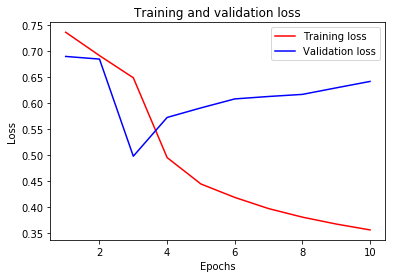

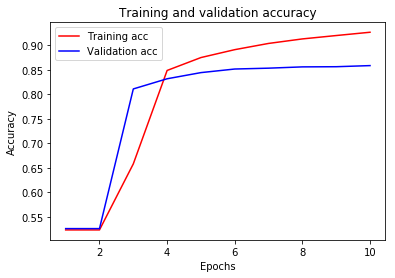

In [56]:
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l2(0.003),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid, kernel_regularizer=keras.regularizers.l2(0.003))
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_padded,
                    train_label,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_padded, test_label),
                    verbose=1)
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [57]:
index_to_word = dict([(value, key) for (key, value) in word_to_index.items()])

def decode_text(text):
    return ' '.join([index_to_word.get(i,'') for i in text])

print(test_padded[3])
decode_text(test_padded[3])

[ 864   27   24 4362    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


'check it out deer                         '

**Visualize the embeddings**

Let's retrieve the word embeddings learned during training. Thi is a matrix of shape (vocab_size, embedding_dim)

In [58]:
e=model.layers[0]
embeddings = e.get_weights()[0]
print(embeddings.shape) 

(27697, 100)


In [59]:
indexWord=5000
print('The word',decode_text([indexWord]),'has embedding vector:')
a=embeddings[indexWord]
print('\n',a)
b=embeddings[indexWord+1]
dista = np.linalg.norm(a)
distb = np.linalg.norm(b)
similarity=a.dot(b)/(dista*distb)
print('\nThe similarity between word',decode_text([indexWord]),'and',decode_text([indexWord+1]),'is',similarity)

The word keith has embedding vector:

 [ 0.14620268 -0.21267866  0.22286479 -0.18135363 -0.15051429 -0.20101574
  0.21257912 -0.16632827 -0.17145473 -0.19029553 -0.21470399 -0.21503037
 -0.15515731  0.12751204  0.18365775 -0.16270645 -0.16091384 -0.21186002
  0.15717293  0.21009435 -0.15025622 -0.17561963 -0.21580535 -0.17192857
  0.15165609 -0.1293982  -0.22099516  0.18231064  0.18825467 -0.16752288
 -0.14893636 -0.1516383  -0.19960068 -0.14661014 -0.15272342 -0.17205644
 -0.21522452  0.19033462  0.18026787  0.20325738 -0.18715484  0.15625411
 -0.19565433 -0.14444873  0.19358571 -0.22004803  0.23161654 -0.22775844
  0.17488854  0.1612459  -0.15348619 -0.21628352 -0.21507159 -0.19195265
  0.18026058  0.21474068  0.20526156  0.1858206   0.14270447  0.21060917
  0.14540043  0.19630863  0.18405773 -0.16964878 -0.19230692 -0.18021299
 -0.12628314 -0.1615427  -0.13728683  0.14404695 -0.14797048  0.14096649
  0.2042769  -0.13148859  0.16198461  0.20381512 -0.21122985  0.2115416
 -0.16127744 

In [60]:
# Function to draw visualization of distance between embeddings.
  def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(
          label,
          xy=(x, y),
          xytext=(5, 2),
          textcoords='offset points',
          ha='right',
          va='bottom')

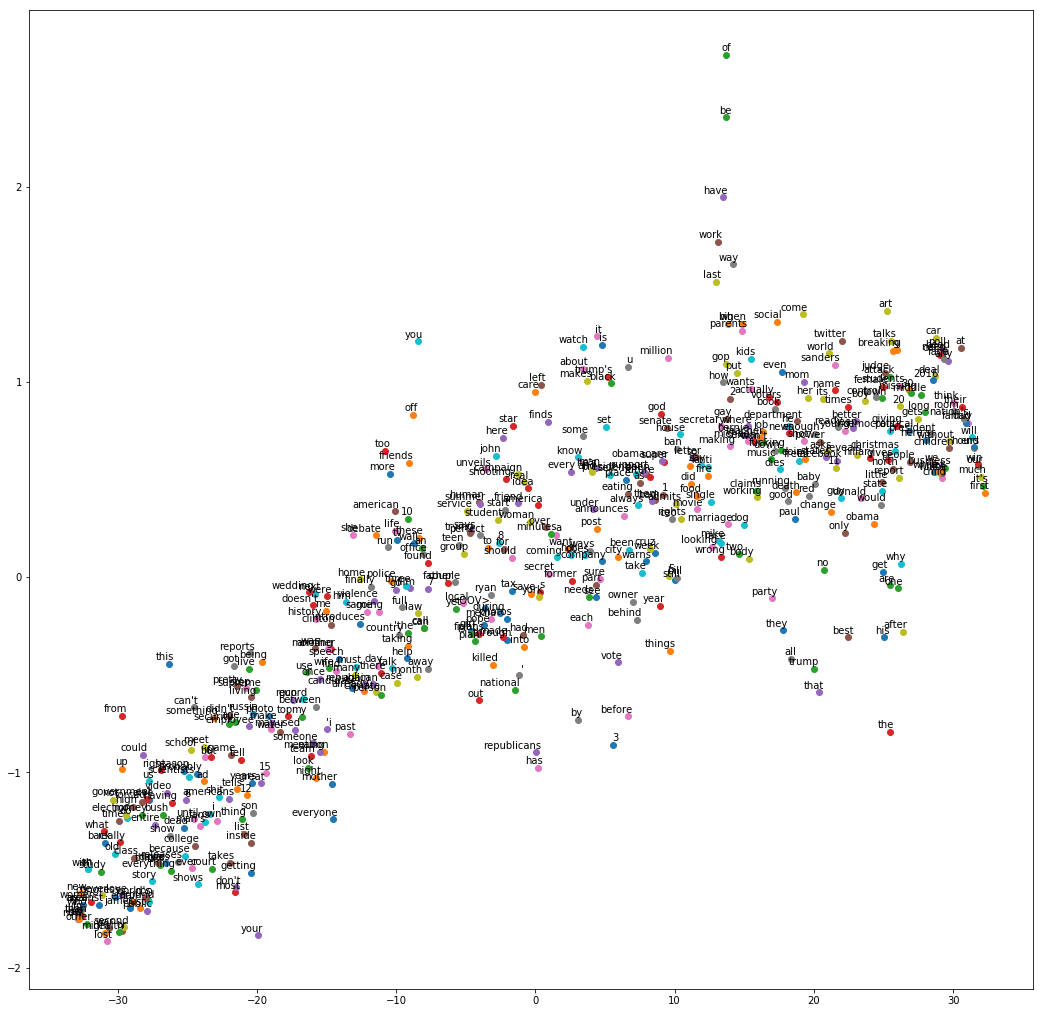

In [61]:
from sklearn.manifold import TSNE

plot_only = 500
tsne = TSNE(perplexity=50, n_components=2, init='pca', n_iter=7000, method='exact')
low_dim_embs = tsne.fit_transform(embeddings[:plot_only, :])
labels = [index_to_word[i] for i in range(1,plot_only)]
plot_with_labels(low_dim_embs, labels)

**Test the model**

Test the model with test dataset.

In [62]:
test_predictions = model.predict_classes(test_padded)
pred=np.squeeze(test_predictions)
error =  pred != test_label
wrong_answers=np.sum(error)/len(error)
print('Wrong answers:',wrong_answers*100,'%')

results = model.evaluate(test_padded, test_label)
print('The accuracy of the model:',results[1])
print('The loss of the model:',results[0])

Wrong answers: 14.138593122709025 %
5729/5729 [==============================] - 0s 38us/sample - loss: 0.6423 - acc: 0.8586
The accuracy of the model: 0.8586141
The loss of the model: 0.6422810869330114


In [63]:
index=500
print(decode_text(test_padded[index]))
answer=pred[index]
if 1==answer:
    print('It\'s sarcastic :)')
else: 
    print('No sarcastic :(')

print('Right answer:',test_label[index])

pool cues go unused in disappointing bar fight                     
It's sarcastic :)
Right answer: 1


In [64]:
sentence=['I am so clever that sometimes I do not understand a single word of what I am saying.',
         'Have no fear of perfection, you\'ll never reach it.',
         'If you\'re going to tell people the truth, be funny or they\'ll kill you.',
         'I like long walks, especially when they are taken by people who annoy me',
         'Only two things are infinite, the universe and human stupidity, and I\'m not sure about the former.',
         'One of the hardest things to imagine is that you are not smarter than average.']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, padding='post',maxlen=100)
p=np.squeeze(model.predict(padded))
for i in range(len(sentence)):
    print('\n',sentence[i],'\n','(probability of sarcasm --> {:.2%})'.format(p[i]))


 I am so clever that sometimes I do not understand a single word of what I am saying. 
 (probability of sarcasm --> 0.23%)

 Have no fear of perfection, you'll never reach it. 
 (probability of sarcasm --> 72.73%)

 If you're going to tell people the truth, be funny or they'll kill you. 
 (probability of sarcasm --> 21.23%)

 I like long walks, especially when they are taken by people who annoy me 
 (probability of sarcasm --> 15.88%)

 Only two things are infinite, the universe and human stupidity, and I'm not sure about the former. 
 (probability of sarcasm --> 0.04%)

 One of the hardest things to imagine is that you are not smarter than average. 
 (probability of sarcasm --> 1.49%)
